This notebook demonstrates that I do not understand how to use ``GaussianProcessRegressor``.

In [15]:
import numpy, pylab
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, RBF
%matplotlib inline

Create a 2000 size array, ``time_vals``, uniformly distributed between 500.0 and 4500.0.

Also create a ``zcoord_vals`` array, equal to ``time_vals`` square root plus a Gaussian normal with standard deviation of 2.5. $z = 10 * t^{1/2} + \frac{5}{2}{\mathcal N}(0,1)$.

In [16]:
time_vals = numpy.random.random_sample( size = 2000 ) * 4500 + 500.0
zcoord_vals = coord_vals = numpy.sqrt( time_vals ) * 10 + 2.0 * numpy.random.normal( size=2000 )

See what they look like -- nothing apparently pathological.

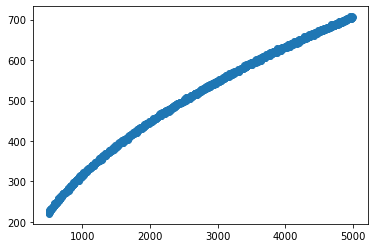

In [23]:
pylab.scatter( time_vals, zcoord_vals );

However, I cannot get ``GaussianProcessRegressor`` to work!

In [27]:
gpr = GaussianProcessRegressor( WhiteKernel( ) + Matern([0.5]))
gpr.fit( time_vals.reshape(-1,1), zcoord_vals )
gpr.kernel_

WhiteKernel(noise_level=1e+05) + Matern(length_scale=1e+05, nu=1.5)

Clearer demonstration in a plot

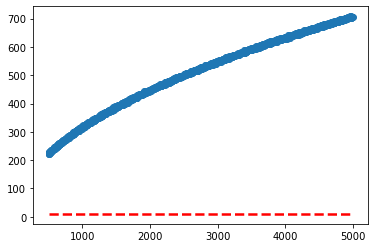

In [28]:
t_pred = numpy.linspace( 500.0, 5000.0, 201)
zcoord_pred = gpr.predict( t_pred.reshape(-1,1))
pylab.scatter( time_vals, zcoord_vals )
pylab.plot( t_pred, zcoord_pred, '--', linewidth = 2.5, color = 'red');